# Loading the requirement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

print("done")

done


In [44]:
df = pd.read_csv("Ecommerce Customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Data Cleaning

In [73]:
# Normalization (dropping the useless columns)
df = df.drop(columns=['Email'])
df = df.drop(columns=['Avatar'])
df = df.drop(columns=['Address'])
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [46]:
# The value of avg session at one or two point is wrong(NaN) so we will replace it with the median

AvgSessionmedian = df['Avg. Session Length'].median()
print(AvgSessionmedian)

df['Avg. Session Length'] = df['Avg. Session Length'].fillna(AvgSessionmedian)
df

33.08852937


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [54]:
df.to_csv("Ecommerce Customers Modified.csv")

# Data Visualization

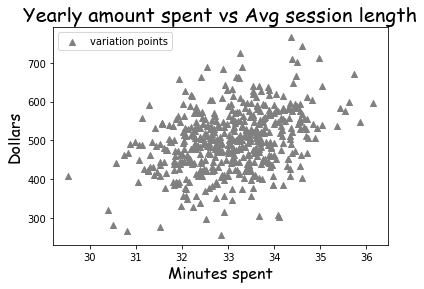

In [47]:
# title
plt.title("Yearly amount spent vs Avg session length",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Avg. Session Length'],df['Yearly Amount Spent'],marker='^',label='variation points',color='grey')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes spent",fontdict={'fontname':'comic sans MS', 'fontsize':16})
plt.ylabel("Dollars",fontdict={'fontname':'comic sans MS', 'fontsize':16})
# saving the plot
# plt.savefig("YearlyamountspentvsAvgsessionlength.jpg",dpi=300)
# show the graph
plt.show()


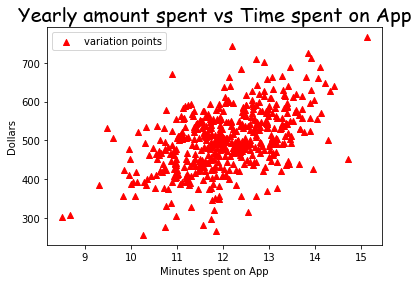

In [48]:
# title
plt.title("Yearly amount spent vs Time spent on App",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Time on App'],df['Yearly Amount Spent'],marker='^',label='variation points',color='red')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes spent on App")
plt.ylabel("Dollars")
# saving the graph
# plt.savefig('Yearly amount spent vs Time spent on App.jpg',dpi=300)
# show the graph
plt.show()

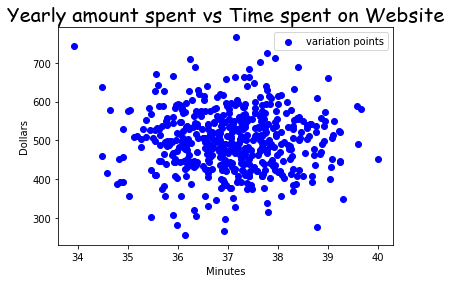

In [49]:
# title
plt.title("Yearly amount spent vs Time spent on Website",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'],marker='o',label='variation points',color='blue')
# legends
plt.legend()
# x and y labels
plt.xlabel("Minutes")
plt.ylabel("Dollars")
# saving the figure
# plt.savefig('Yearly amount spent vs Time spent on Website.jpg',dpi=300)
# show the graph
plt.show()

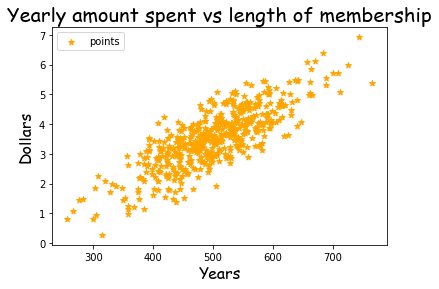

In [50]:
# title
plt.title("Yearly amount spent vs length of membership",fontdict={'fontname':'comic sans MS', 'fontsize':20})
# plot
plt.scatter(df['Yearly Amount Spent'],df['Length of Membership'],color='orange',marker='*',label='points')
# x and y labels
plt.xlabel("Years",fontdict={'fontname':'comic sans MS', 'fontsize':16})
plt.ylabel("Dollars",fontdict={'fontname':'comic sans MS', 'fontsize':16})
# show the legends
plt.legend()
# save the graph
# plt.savefig('Yearly amount spent vs length of membership.jpg',dpi=300)
# show the graph
plt.show()


# Regression Model

In [79]:
x = df.drop(['Yearly Amount Spent'],axis=1).values 
# print(x)
y = df['Yearly Amount Spent'].values
# print(y)

In [83]:
# splitting the datset
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [51]:
# Naive Method
regression = linear_model.LinearRegression()
regression.fit(df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']].values,df['Yearly Amount Spent'].values)
# regression.fit(df[['Time on App','Time on Website','Length of Membership']].values,df['Yearly Amount Spent'].values)

LinearRegression()

In [84]:
# Best method
regression.fit(x_train, y_train)

LinearRegression()

In [86]:
pred = regression.predict(x_test)
print(pred)

[437.35084967 489.54254025 369.92050123 514.94374094 496.83478829
 451.2498724  457.10921729 335.96003664 527.7541065  664.19795597
 559.92305086 525.96128031 551.63542934 455.52086471 449.31678045
 430.93459341 562.87186121 408.52770729 599.07185633 486.66819923
 715.83669445 496.78607714 411.05125697 555.68639295 550.40352383
 398.66087209 419.71092012 395.68027341 547.99022599 463.64795192
 557.9797607  504.97765326 505.65229945 463.75027462 426.47018436
 400.03325211 503.11754065 429.74172161 570.39045612 421.12541101
 488.09962519 601.61079404 615.87962998 589.80531146 449.48165627
 379.69988023 557.60102656 461.77875524 502.32271141 400.83750988
 523.89235135 416.41975091 576.63369805 477.3212855  456.2440918
 398.46292423 564.98435069 303.93235879 562.09794103 477.21361004
 499.11120378 434.6100408  464.30088385 577.46392887 502.70412559
 355.60504089 507.55635443 415.92203314 635.51778832 454.81479255
 453.02150092 766.52470587 518.21263648 456.86895354 378.68793945
 376.074786

In [87]:
ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})
# ExtraDf = pd.DataFrame({'Time on App':[15.13],'Time on Website':[37.16],'Length of Membership':[5.38]})

regression.predict(ExtraDf.values)
# array([732.78621488]) if 3 values are taken

array([593.79419875])

### let's see accuracy of our model

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9848033950940315

### plotting the results

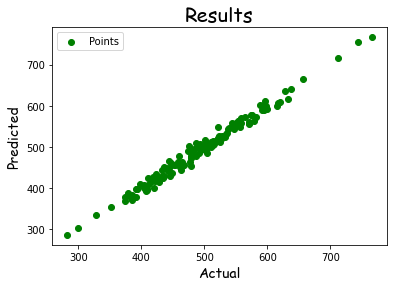

In [94]:
# figure size
# plt.figure(figsize={5,8})
# title 
plt.title("Results", fontdict={'fontname': 'comic sans MS', 'fontsize': 20})
# plot graph
plt.scatter(y_test,pred,color='green',label="Points",marker='o')
# x and y
plt.xlabel("Actual",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
plt.ylabel("Predicted",fontdict={'fontname': 'comic sans MS', 'fontsize': 14})
# legends
plt.legend(loc='upper left');
# show graph
plt.show()

### creating a results csv


In [98]:
results = pd.DataFrame({'Actual Values': y_test,'Predicted Values':pred,'Difference': y_test-pred})

results.head(10)

results.to_csv('Results.csv')

# Mathematical proof

In [53]:
m = regression.coef_
c = regression.intercept_

print('m :',m)
print('c :',c)

m1 = m[0]
m2 = m[1]
m3 = m[2]
m4 = m[3]

y = m1*(34.5) + m2*(12.66) + m3*(39.58)+ m4*(4.08) + c
print(y)

m : [25.71504744 38.55674309  0.4425814  61.83342745]
c : -1050.3960370826046
594.6992232268465


# Where should the company put their attention Website or App?

In [63]:
# we will keep everything constant and will be changing only time on app value

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val1 = regression.predict(ExtraDf.values)[0]
print(val1)

# second phase

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[14.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val2 = regression.predict(ExtraDf.values)[0]
print(val2)

# third 

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[16.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val3 = regression.predict(ExtraDf.values)[0]
print(val3)

listIncInyearlyAmtSpent1 = [val1,val2,val3]
print(listIncInyearlyAmtSpent1)

594.6992232268465
671.8127094158556
748.9261956048647
[594.6992232268465, 671.8127094158556, 748.9261956048647]


In [64]:
# we will keep everything constant and we be changing only time on website

ExtraDf = pd.DataFrame({'Avg. Session Length':[34.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val1 = regression.predict(ExtraDf.values)[0]
print(val1)

# second phase

ExtraDf = pd.DataFrame({'Avg. Session Length':[36.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val2 = regression.predict(ExtraDf.values)[0]
print(val2)

# third 

ExtraDf = pd.DataFrame({'Avg. Session Length':[38.5],'Time on App':[12.66],'Time on Website':[39.58],'Length of Membership':[4.08]})

val3 = regression.predict(ExtraDf.values)[0]
print(val3)

listIncInyearlyAmtSpent2 = [val1,val2,val3]
print(listIncInyearlyAmtSpent2)

594.6992232268465
646.1293181160386
697.5594130052305
[594.6992232268465, 646.1293181160386, 697.5594130052305]


In [68]:
newList = []

newList = np.array(listIncInyearlyAmtSpent1) - np.array(listIncInyearlyAmtSpent2)

newList

array([ 0.       , 25.6833913, 51.3667826])

# As we can see the difference between the values the company should clearly focus on app 